# Agrupamiento de Datos
## Curso Ingeniería Masiva de Datos
## TecMilenio
## Ejercicio Kmeans Clustering con set de Datos Mall Customers

In [1]:
# Importando librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id=1></a><br>
## Leer Datos

In [2]:
# Incuye aquí el código para leer los datos del archivo 'Mall_Customers.csv'
# Aqui unicamente vemos nuestro dataframe
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Incluye aquí el código para comprobar y describir los datos leídos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<a id=1></a><br>
## Explorar Datos

<function matplotlib.pyplot.show(close=None, block=None)>

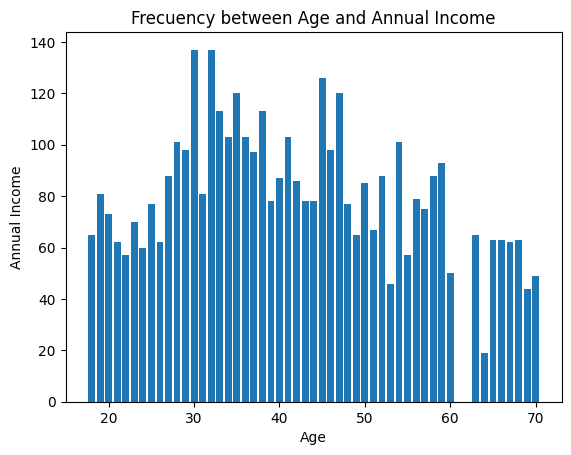

In [4]:
# Incluye aquí tu código para crear histogramas 
# Creamos un histograma de frecuencia entre la edad y su ingreso anual, observando que los maximos se los llevan las edades de 30-34/35. 
# Mientras que los minimos se los llevan por la edad de 64.
x = df['Age']
y = df['Annual Income (k$)']
plt.bar(x, y)
plt.title("Frecuency between Age and Annual Income")
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

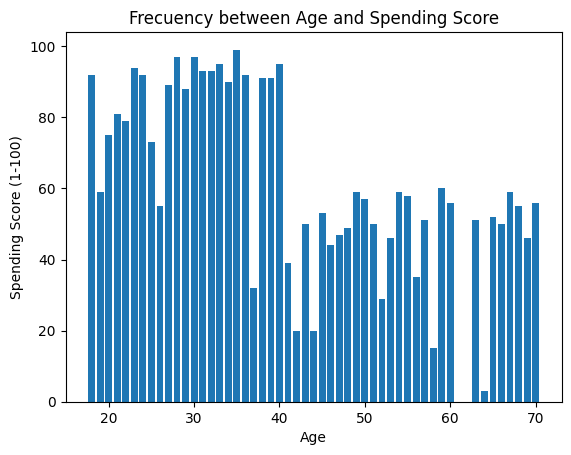

In [5]:
# Creamos un histograma de frecuencia entre la edad y su spending score, observando que los maximos se los llevan las edades de 18-39. 
# Mientras que los minimos se los llevan por la edad de 64, 57-58 y 43-46.
x = df['Age']
y = df['Spending Score (1-100)']
plt.bar(x, y)
plt.title("Frecuency between Age and Spending Score")
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

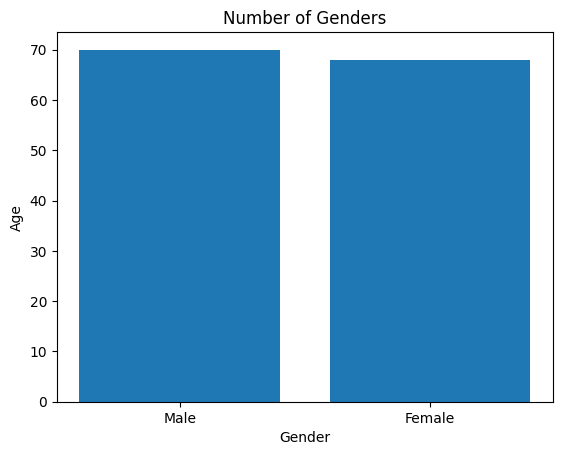

In [6]:
# Creamos un histograma de frecuencia entre la edad y la cantidad de generos, observando que unicamente hombres llegan a casi la edad de 70 mientras que las mujeres llegan a 65-68
x = df['Gender']
y = df['Age']
plt.title("Number of Genders")
plt.xlabel('Gender')
plt.ylabel('Age')
plt.bar(x, y)
plt.show

Gente de 18 a 25: 38
Gente de 26 a 35: 60
Gente de 36 a 45: 36
Gente de 46 a 55: 37
Gente mayor de 55: 29


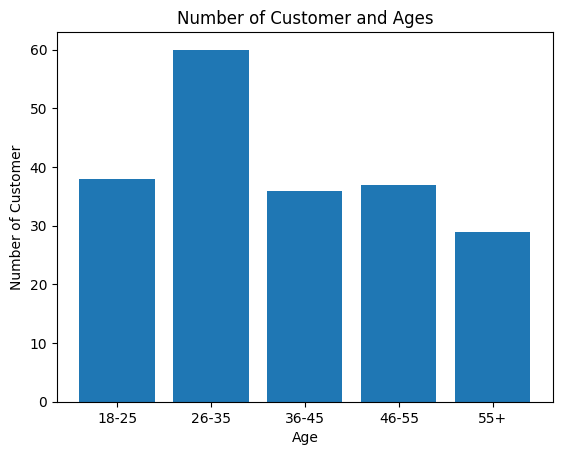

In [7]:
# Establecemos rangos para ver la cantidad de clientes por su edad
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

# Observamos cuantos hay en cada variable
print("Gente de 18 a 25: " +  str(len(age18_25.values)))
print("Gente de 26 a 35: " +  str(len(age26_35.values)))
print("Gente de 36 a 45: " +  str(len(age36_45.values)))
print("Gente de 46 a 55: " +  str(len(age46_55.values)))
print("Gente mayor de 55: " +  str(len(age55above.values)))

# Finalmente creamos un grafico de barras para observar estos grupos.
x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.bar(x, y, width= 0.8, data=y)
plt.show()

Gastos de 1 a 20: 36
Gastos de 21 a 40: 27
Gastos de 31 a 60: 75
Gastos de 41 a 80: 32
Gastos de 81 a 100: 30


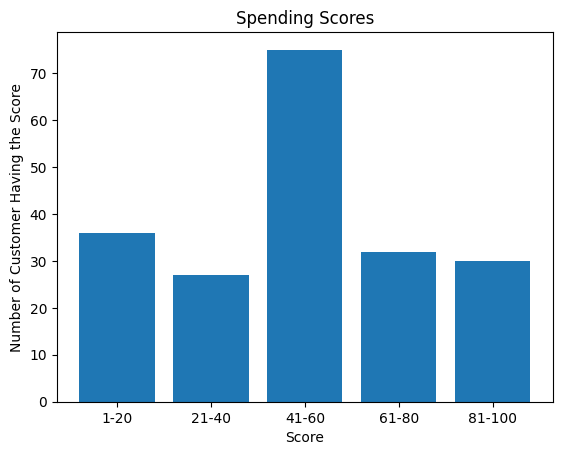

In [8]:
# Establecemos rangos para ver la cantidad de clientes por su Spending Score
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]

# Observamos cuantos hay en cada variable
print("Gastos de 1 a 20: " +  str(len(ss1_20.values)))
print("Gastos de 21 a 40: " +  str(len(ss21_40.values)))
print("Gastos de 31 a 60: " +  str(len(ss41_60.values)))
print("Gastos de 41 a 80: " +  str(len(ss61_80.values)))
print("Gastos de 81 a 100: " +  str(len(ss81_100.values)))

ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

# Finalmente creamos un grafico de barras para observar estos grupos.
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.bar(ssx, ssy, width = 0.8, data = ssy)
plt.show()

Ingresos de 0 a 30: 32
Ingresos de 31 a 60: 66
Ingresos de 61 a 90: 80
Ingresos de 91 a 120: 80
Ingresos de 121 a 150: 4


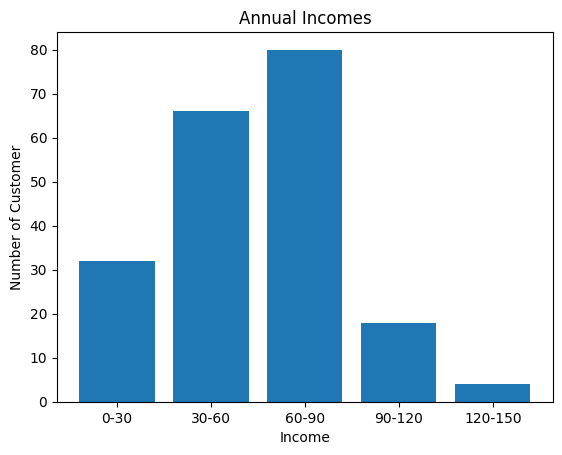

In [9]:
# Establecemos rangos para ver la cantidad de clientes por su Ingreso Anual
ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

# Observamos cuantos hay en cada variable
print("Ingresos de 0 a 30: " +  str(len(ai0_30.values)))
print("Ingresos de 31 a 60: " +  str(len(ai31_60.values)))
print("Ingresos de 61 a 90: " +  str(len(ai61_90.values)))
print("Ingresos de 91 a 120: " +  str(len(ai61_90.values)))
print("Ingresos de 121 a 150: " +  str(len(ai121_150.values)))

aix = ['0-30', '30-60', '60-90', '90-120', '120-150']
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

# Finalmente creamos un grafico de barras para observar estos grupos.
plt.title('Annual Incomes')
plt.xlabel('Income')
plt.ylabel('Number of Customer')
plt.bar(aix, aiy, width = 0.8 , data = aiy)
plt.show()

In [10]:
# Eliminar columna customer id y sexo para hacer K-means con los otros Edad, Score de Gato e Ingreso
df.drop(['CustomerID', 'Gender'], axis = 1, inplace=True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


<a id=2></a><br>
## K-Means

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

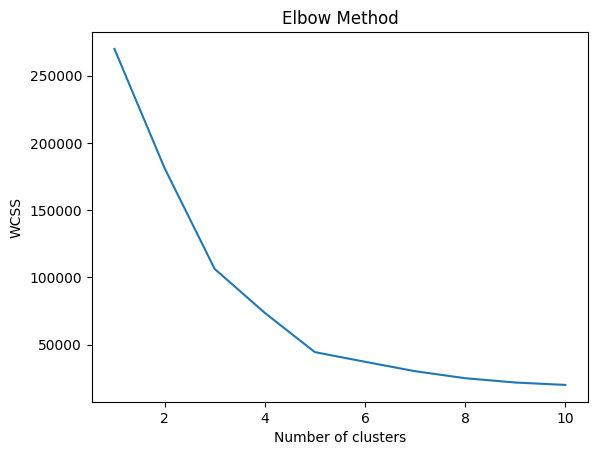

In [11]:
# Terminamos por crear la grafica para ver cuantos clusters son mas relacionables para el metodo de K-Means
from sklearn.cluster import KMeans

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)

#Finalmente imprimimos la grafica que nos dio
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



## ¿Cuál es el valor de K que use?


c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


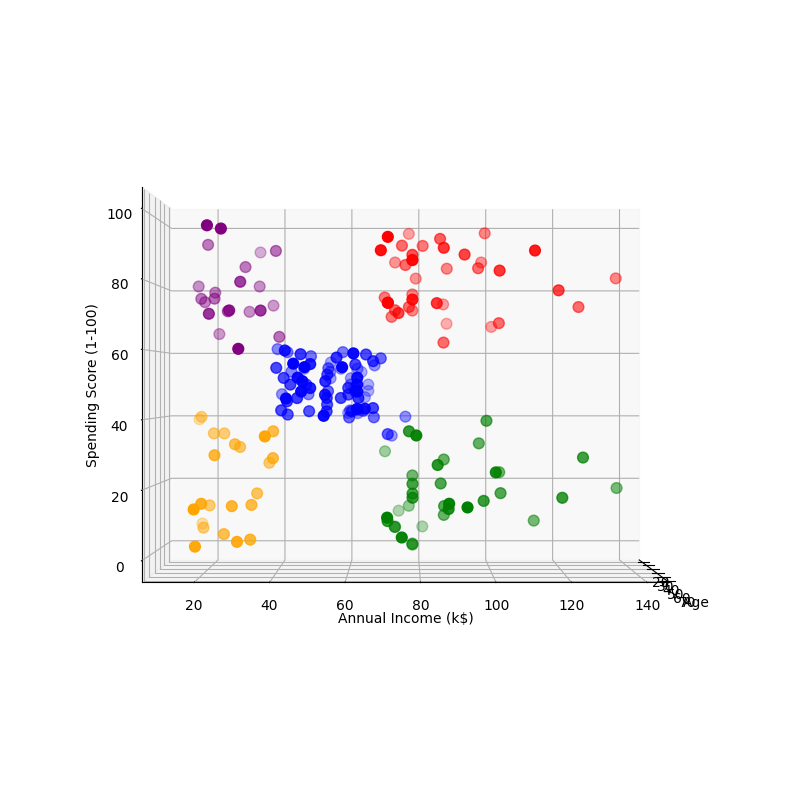

In [20]:
# completa el código para poner el número de clusters que decidiste, en este caso 5, ya que es donde la curvatura deja de ser tan drastica.
km = KMeans(n_clusters = 5)
clusters_num = km.fit_predict(df.iloc[:,1:])

# Crea una columna nueva con el cluster
df['label'] = clusters_num

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# %matplotlib notebook lo utilice en Jupyter Notebook para la visualizacion mejor del scatter 3D, y asi podemos observar exactamente los valores.
# %matplotlib notebook

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.Age[df.label== 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(0, 0)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

Tenemos 5 tipos de clientes que aparecen en la gráfica en diferentes colores.

# Descripcion de los clusters. 


Como podemos observar tenemos una cantidad de 5 clusters. 
Elegi esa cantidad ya que es donde se rompe la bajada tan drasticamente, y toma ahora una bajada mas constante y ligera.

Podemos observar primeramente los valores rojos/cluster rojo, el cual tiene un ingreso de 70k anuales minimo, llegando a un 80k promedio, y solamente uno llega casi al maximo de 140k.
En el caso del spending score vemos como todos se encuentran arriba de 60, mientras que los mas altos llegan a casi el maximo de 100. 
Finalmente, en las edades, podemos ver que varian desde los 26-27 hasta los 41-42.

Podemos observar ahora los valores morados/cluster morado, este cluster por lo que pude observar es el mas pequeno de los cinco, el cual tiene un ingreso de 16-17k anuales minimo, llegando a un 30k promedio, y solamente llegando al maximo de 40k.
En el caso del spending score vemos como todos se encuentran arriba de 60 a excepcion de uno, mientras que los mas altos llegan a casi el maximo de 100. 
Finalmente, en las edades, podemos ver que varian desde los 18 hasta los 35.

Podemos observar los valores amarillos/cluster amarillo, el cual tiene el menor ingreso de 15k anuales minimo, llegando a un 20-30k promedio, y solamente uno llega casi al maximo de 40k.
En el caso del spending score vemos como todos se encuentran algunos desde el valor de 1, mientras que los mas altos llegan a casi el valor de 40. 
Finalmente, en las edades, podemos ver que varian desde los 18 hasta los 65.

Podemos observar los valores verdes/cluster verde, el cual tiene un ingreso de 70k anuales minimo, llegando a un 90k promedio, y solamente uno llega casi al maximo de 140k.
En el caso del spending score vemos como el valor minimo es de 1, mientras que los mas altos llegan a casi el valor de 40. 
Finalmente, en las edades, podemos ver que varian desde los 18 hasta los casi 60.

Finalmente podemos observar, el cual es el mas grande de todos, podemos ver los valores azules/cluster azul, el cual tiene un ingreso de 39k anuales minimo, llegando a un 50k promedio, y solamente llegan casi al maximo de 80k.
En el caso del spending score vemos como todos se encuentran entre 40-60, con algunas excepciones que llegan a poquito menos de 40.
Finalmente, en las edades, podemos ver que varian desde los 18 hasta los 70.